In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [10]:
# Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 2

In [11]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

In [12]:
# Add custom layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(base_model.input, output)

In [13]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Data augmentation and loading
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)
train_generator = train_datagen.flow_from_directory('dataset', target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='training')
validation_generator = train_datagen.flow_from_directory('dataset', target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='validation')

Found 214 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


In [15]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=EPOCHS)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5798 - loss: 3.0637 - val_accuracy: 0.6111 - val_loss: 1.9222
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7589 - loss: 0.9379 - val_accuracy: 0.8611 - val_loss: 0.5656
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9193 - loss: 0.2416 - val_accuracy: 0.8333 - val_loss: 0.5350
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9703 - loss: 0.1145 - val_accuracy: 0.8611 - val_loss: 0.3961
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9863 - loss: 0.0440 - val_accuracy: 0.8611 - val_loss: 0.4263
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9852 - loss: 0.0186 - val_accuracy: 0.8056 - val_loss: 0.6284
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 1.0000 - loss: 0.0185 - val_accuracy: 0.8333 - val_loss: 0.3848
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 1.0000 - loss: 5.8685e-04 - val_accuracy: 0.8611 - val_loss: 0.4108
Epoc

In [18]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print(f"Test Accuracy: {test_acc*100}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 0.8843 - loss: 0.5273
Test Accuracy: 88.88888955116272


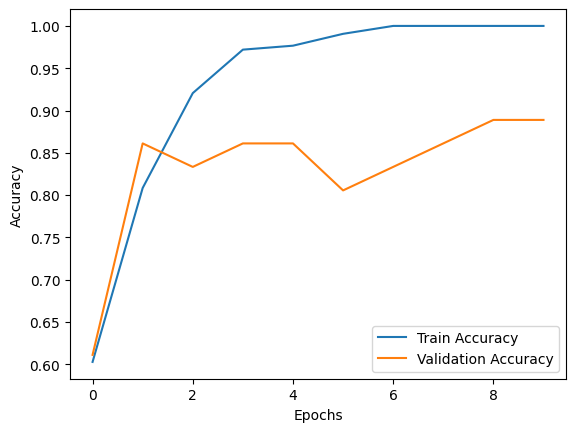

In [19]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()